# Autoencoder study #1
<hr style='height:5px'>
kwanki.ahn<br>
2019/06/01<br>
ref : https://keraskorea.github.io/posts/2018-10-23-keras_autoencoder/
<hr style='height:5px'>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


* 인코더와 디코더로 single fully-connected neural layer를 사용합니다

In [3]:
# 인코딩될 표현(representation)의 크기
encoding_dim = 32 # 32 floats -> 24.5의 압축으로 입력이 784 float라고 가정 

# 입력 플레이스홀더
input_img = Input(shape=(784,))
# "encoded"는 입력의 인코딩된 표현
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded"는 입력의 손실있는 재구성 (lossy reconstruction)
decoded = Dense(784, activation='sigmoid')(encoded)

# 입력을 입력의 재구성으로 매핑할 모델
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


* 분리된 인코더 모델도 만듭시다

In [4]:
# 이 모델은 입력을 입력의 인코딩된 입력의 표현으로 매핑
encoder = Model(input_img, encoded)

* 디코더 모델도 만듭니다

In [5]:
# 인코딩된 입력을 위한 플레이스 홀더
encoded_input = Input(shape=(encoding_dim,))
# 오토인코더 모델의 마지막 레이어 얻기
decoder_layer = autoencoder.layers[-1]
# 디코더 모델 생성
decoder = Model(encoded_input, decoder_layer(encoded_input))

* 이제 우리의 autoencoder로 MNIST 숫자를 재구성해봅시다.
* 먼저, 픽셀 당 바이너리 크로스엔트로피 손실을 사용하도록 모델을 구성하고, optimizer로 Adadelta를 사용합시다

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


* 입력 데이터를 준비합시다. MNIST 숫자를 사용할 것이고, 라벨은 버리도록 하겠습니다. 입력 이미지를 인코딩하고 디코딩하는 데에만 관심이 있기 때문이죠

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape


(60000, 784)
(10000, 784)


* 이제 autoencoder를 50 epoch 동안 훈련시키죠

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.3808 - val_loss: 0.2730
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2662 - val_loss: 0.2565
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.2470 - val_loss: 0.2354
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2270 - val_loss: 0.2167
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2111 - val_loss: 0.2033
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1995 - val_loss: 0.1933
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1904 - val_loss: 0.1852
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1830 - val_loss: 0.1786
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1769 - val_loss: 0.1729
Epoch 10/50
60000/60000 [======================

* 50 epoch 이후, autoencoder는 약 0.11의 안정적인 train/test 손실 값에 도달하였습니다. 재구성된 입력과 인코딩된 표현(representation)을 시각화 해봅시다. Matplotlib을 이용하겠습니다

In [10]:
# 숫자들을 인코딩 / 디코딩
# test set에서 숫자들을 가져왔다는 것을 유의
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

* 아래에 결과가 있습니다. 위의 줄은 원래의 숫자이고 아랫 줄은 재구성된 숫자입니다. 지금 사용한 간단한 접근 방법으로 꽤 많은 비트 손실이 있었다는 것을 알 수 있습니다

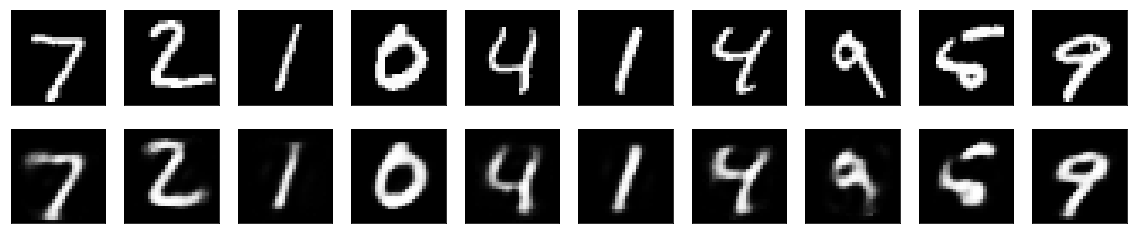

In [11]:
# Matplotlib 사용
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
